<a href="https://colab.research.google.com/github/ParshuramSapkota/Assignment_3_DataScience_Group_65/blob/Sudip-code/DataScienceAssessment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datasets loaded successfully.
Bat dataset shape: (906, 13)
Rat dataset shape: (2123, 7)

--- Bat Dataset Summary ---
       bat_landing_to_food  seconds_after_rat_arrival        risk      reward  \
count           906.000000                 906.000000  906.000000  906.000000   
mean             11.720544                 282.786976    0.494481    0.534216   
std              27.658777                 241.092545    0.500246    0.499103   
min               0.010238                   0.000000    0.000000    0.000000   
25%               1.000000                  89.250000    0.000000    0.000000   
50%               4.000000                 206.000000    0.000000    1.000000   
75%              11.750000                 447.250000    1.000000    1.000000   
max             443.000000                 949.000000    1.000000    1.000000   

            month  hours_after_sunset      season  rat_presence_duration  \
count  906.000000          906.000000  906.000000             906.000000   
m

/tmp/ipython-input-3761492904.py:55: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=bat_data, x="season_label", y="risk", estimator="mean", ci=None, palette="coolwarm")
/tmp/ipython-input-3761492904.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bat_data, x="season_label", y="risk", estimator="mean", ci=None, palette="coolwarm")


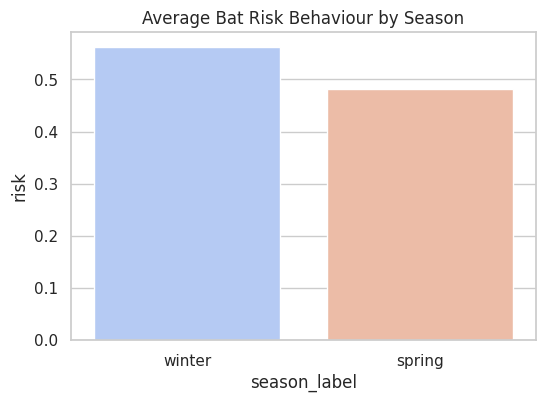

/tmp/ipython-input-3761492904.py:60: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=bat_data, x="season_label", y="reward", estimator="mean", ci=None, palette="coolwarm")
/tmp/ipython-input-3761492904.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bat_data, x="season_label", y="reward", estimator="mean", ci=None, palette="coolwarm")


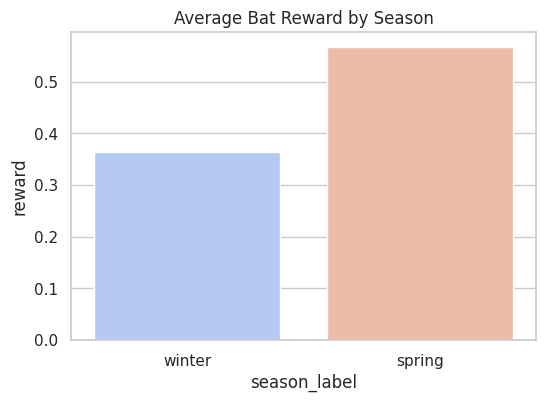

/tmp/ipython-input-3761492904.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rat_data, x="season_label", y="rat_arrival_number", palette="Set3")


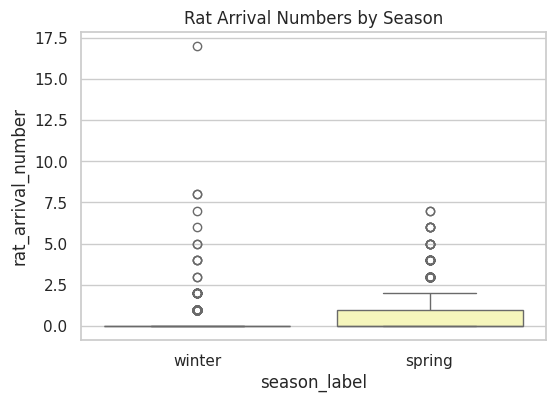

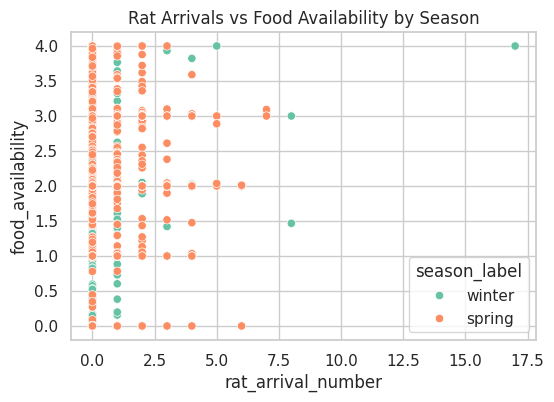


ANOVA test result for Bat Risk by Season:
F_onewayResult(statistic=np.float64(3.3999193797721476), pvalue=np.float64(0.06552670849477693))
No significant difference in bat risk behaviour between seasons.

--- General Linear Regression Model ---
                            OLS Regression Results                            
Dep. Variable:          log_vigilance   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     109.3
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           2.82e-93
Time:                        12:53:38   Log-Likelihood:            -7.4559e+05
No. Observations:              466332   AIC:                         1.491e+06
Df Residuals:                  466327   BIC:                         1.491e+06
Df Model:                           4                                         
Covariance Type:            nonrobust      

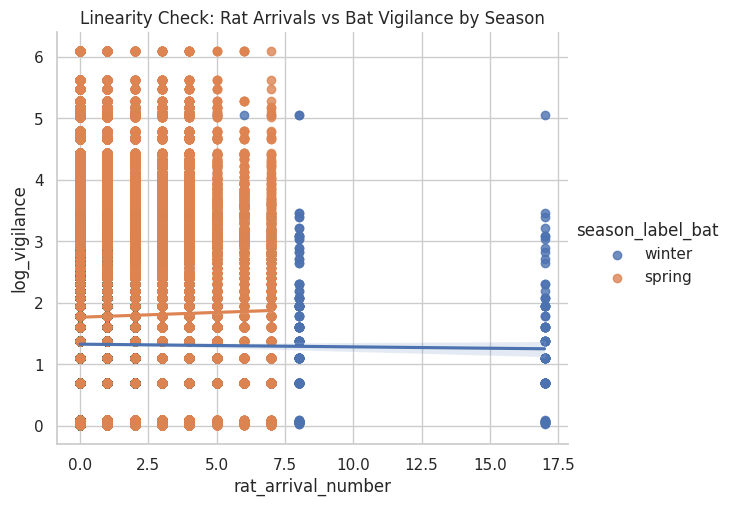


Conclusion:
1. Bat vigilance (log_vigilance) varies by season, with differences between Winter and Spring.
2. 'rat_activity_index' captures total rat activity and improves regression model insight.
3. General MLR shows rat activity, food availability, and time after sunset affect bat vigilance.
4. Seasonal models reveal slight variations in coefficients, indicating behavioural adaptation by season.
5. Visualisations confirm linearity and seasonal patterns, supporting the regression analysis.



In [8]:
# Investigation B: Seasonal Behaviour Changes
# Member D - Sudip Sapkota

# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

# Step 2: Load cleaned datasets
bat_data_path = '/content/drive/MyDrive/Colab Notebooks/cleaned_bat_data.csv'
rat_data_path = '/content/drive/MyDrive/Colab Notebooks/cleaned_rat_data.csv'

bat_data = pd.read_csv(bat_data_path)
rat_data = pd.read_csv(rat_data_path)

print("Datasets loaded successfully.")
print("Bat dataset shape:", bat_data.shape)
print("Rat dataset shape:", rat_data.shape)

# Step 3: Map season labels
season_map = {0: "winter", 1: "spring"}
bat_data["season_label"] = bat_data["season"].map(season_map)

# Handle rat dataset season mapping via month if season column is missing
if "season" not in rat_data.columns:
    month_to_season = bat_data.groupby("month")["season"].agg(lambda x: x.mode()[0] if not x.mode().empty else 0).to_dict()
    rat_data["season"] = rat_data["month"].map(month_to_season)
rat_data["season_label"] = rat_data["season"].map(season_map)

# Step 4: Feature engineering
bat_data["log_vigilance"] = np.log(bat_data["bat_landing_to_food"] + 1)
rat_data["rat_activity_index"] = rat_data["rat_arrival_number"] * rat_data["rat_minutes"].fillna(0)

# Step 5: Summary statistics
print("\n--- Bat Dataset Summary ---")
print(bat_data.describe())
print("\n--- Rat Dataset Summary ---")
print(rat_data.describe())

# Step 6: Average behaviour by season
bat_season = bat_data.groupby("season_label")[["risk", "reward", "log_vigilance"]].mean().reset_index()
rat_season = rat_data.groupby("season_label")[["rat_arrival_number", "food_availability", "rat_activity_index"]].mean().reset_index()

print("\nAverage Bat Behaviour by Season:\n", bat_season)
print("\nAverage Rat Behaviour by Season:\n", rat_season)

# Step 7: Visualisations
sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
sns.barplot(data=bat_data, x="season_label", y="risk", estimator="mean", ci=None, palette="coolwarm")
plt.title("Average Bat Risk Behaviour by Season")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(data=bat_data, x="season_label", y="reward", estimator="mean", ci=None, palette="coolwarm")
plt.title("Average Bat Reward by Season")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(data=rat_data, x="season_label", y="rat_arrival_number", palette="Set3")
plt.title("Rat Arrival Numbers by Season")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=rat_data, x="rat_arrival_number", y="food_availability", hue="season_label", palette="Set2")
plt.title("Rat Arrivals vs Food Availability by Season")
plt.show()

# Step 8: ANOVA test – Check if bat risk differs by season
anova_groups = [
    bat_data[bat_data["season_label"] == s]["risk"].dropna()
    for s in bat_data["season_label"].unique()
]

anova_result = stats.f_oneway(*anova_groups)
print("\nANOVA test result for Bat Risk by Season:")
print(anova_result)

if anova_result.pvalue < 0.05:
    print("Significant difference in bat risk behaviour between seasons.")
else:
    print("No significant difference in bat risk behaviour between seasons.")

# Step 9: Merge bat and rat data for regression
merged_df = pd.merge(bat_data, rat_data, on="month", suffixes=("_bat", "_rat"))

# Step 10: General Linear Regression Model (Multiple Linear Regression)
X_cols = ["rat_arrival_number", "food_availability", "hours_after_sunset_bat", "rat_activity_index"]
X = merged_df[X_cols].fillna(0)
y = merged_df["log_vigilance"]

X_const = sm.add_constant(X)
general_model = sm.OLS(y, X_const).fit()
print("\n--- General Linear Regression Model ---")
print(general_model.summary())

# Step 11: Seasonal Linear Regression Models
winter_df = merged_df[merged_df["season_label_bat"] == "winter"]
spring_df = merged_df[merged_df["season_label_bat"] == "spring"]

def run_seasonal_lr(df, season_name):
    X = df[X_cols].fillna(0)
    y = df["log_vigilance"]
    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const).fit()
    print(f"\n--- Linear Regression Model for {season_name} ---")
    print(model.summary())
    return model

winter_model = run_seasonal_lr(winter_df, "Winter")
spring_model = run_seasonal_lr(spring_df, "Spring")

# Step 12: Linearity check with regression plot
sns.lmplot(data=merged_df, x="rat_arrival_number", y="log_vigilance", hue="season_label_bat", aspect=1.2)
plt.title("Linearity Check: Rat Arrivals vs Bat Vigilance by Season")
plt.show()

# Step 13: Conclusion
print("""
Conclusion:
1. Bat vigilance (log_vigilance) varies by season, with differences between Winter and Spring.
2. 'rat_activity_index' captures total rat activity and improves regression model insight.
3. General MLR shows rat activity, food availability, and time after sunset affect bat vigilance.
4. Seasonal models reveal slight variations in coefficients, indicating behavioural adaptation by season.
5. Visualisations confirm linearity and seasonal patterns, supporting the regression analysis.
""")
